In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 3 on probability from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts.
</span>

You can find the corresponding post [here](https://hadrienj.github.io/posts/Marginal-and-Conditional-Probability/) on my blog.

We have studied the basics of probability in [the last post](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/)/[notebook](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions) about chapters 3.1 to 3.3 of the Deep Learning Book. We have learned what is a random variable, a probability mass function or a probability density function. The goal was also to gain more intuition for very used tools like derivatives, the area under the curve and integrals.

In this second post/notebook on marginal and conditional probability you will learn about joint and marginal probability for discrete and continuous variables. Then, we will see the concept of conditional probability and the difference between dependent and independent events. All of this corresponds to chapters 3.4 and 3.5 of the Deep Learning Book.

We'll insist on the mathematical notation employed in probability. You'll see that this is an expressive and synthetic way of expressing ideas! 

# 3.4 Marginal Probability

In the preceding posts, we have seen the probability of one random variable at a time. In some cases, it can be interested to see the probabilities of multiple events. For instance, we would ask: "If I toss a coin two times, what is the probability to obtain exactly one 'head' and one 'tail'? To answer this kind of questions we need to take into account multiple events.

### Notation

Let's start with some details about the notation. As usual, it is important to ensure that every single piece of mathematical notation is crystal clear. The following figure summarises the notation we'll use in this article 🔧:

<img src="images/summary-mathematical-notation.png" width="500" alt="Explanation of mathematical notation used for probability" title="Mathematical notation used in probability.">
<em>Dictionary of mathematical expressions and their corresponding English traductions.</em>

As we have seen in the last post, $P(\text{x}=x, \text{y}=y)$ refers to the **joint probability** that $\text{x}$ takes the specific value $x$ **and** that $\text{y}$ takes the specific value $y$. For details on the notation, you can also refer to the previous article. You may also encounter the intersection notation: $\cap$. For instance $P(\text{x} \cap \text{y})$ corresponds to the probability that both $\text{x}$ and $\text{y}$ occur.


### Example 1.

Let's start with an example to tackle the notion of marginal probability.

In this experiment, we toss a coin (first event) and throw a dice (second event). We look at the probability of each event. For instance, the probability to get a 'head' is $\frac{1}{2}$. The probability to roll a 1 is $\frac{1}{6}$. The following figure shows the probabilities of each outcome for each event individually:

<img src="images/marginal-probabilities-empty.png" width="500" alt="Probabilities of two events. Marginal probabilities correspond to the single event probability" title="Marginal probability. The probabilities of two events (tossing a coin and throwing a dice) are represented.">
<em>The probabilities of two events (tossing a coin and throwing a dice) are represented individually.</em>

You can be surprised that I displayed the probabilities in a table. Actually, I took the problem backward: these probabilities are the **marginal probabilities**. The name 'marginal' reminds the idea that we can write them in the margins of the table.

The question is: what are the other probabilities we could write in the middle of the table? They are the **joint probabilities**. It is the probability to get two specific outcomes:

<img src="images/marginal-probabilities.png" width="500" alt="Probabilities of two events. Marginal probabilities correspond to the single event probability" title="Marginal probability. The probabilities of two events (tossing a coin and throwing a dice) are represented.">
<em>Marginal probability. The probabilities of two events (tossing a coin and throwing a dice) are represented. The marginal probabilities are in the 'margin' and correspond to the probabilities of each event alone.</em>

We can see for instance that the probability to get a 1 and a 'head' is equal to $\frac{1}{6} \times \frac{1}{2} = \frac{1}{12}$. The **marginal probabilities** are represented on the margins and correspond to the probability distribution of a subset of the variables.



### Sum rule

Sometimes, you know the joint probability of events and need to calculate the marginal probabilities from it. The marginal probabilities are calculated with the **sum rule**. If you look back to the last table, you can see that the probabilities written in the margins are the sum of the probabilities of the corresponding row or column.

Expressing this mathematically, we have:

$$
\forall x \in \text{x}, P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

We'll go into the details of this equation.

First, remind that the typeface is important and indicate different things. $\text{x}$ is a discrete random variable (for instance, corresponding to throwing a dice) and $x$ is the outcome of the random event (for instance, one of the possible dice outcomes: 1, 2, 3, 4, 5, or 6). Identically, $\text{y}$ is random variable (let's say corresponding to a coin toss) and $y$ is the outcome of $\text{y}$ ('heads' or 'tails').

<img src="images/sum_rule_1.png" width="400" alt="Equation of the sum rule" title="The sum rule">

- <span style="color:#28EEEB">$\forall x \in \text{x}$</span> can be read "for all $x$ in $\text{x}$". Here, this is a condition for the equation to be true. So the expression is true only when the outcome $x$ is among the possible outcomes of $\text{x}$. For instance if the random variable $\text{x}$ corresponds to throwing a dice, we know that $x$ can takes the values 1, 2, 3, 4, 5 or 6. The equation is true only when $x$ actually takes one of these values.

<img src="images/sum_rule_2.png" width="400" alt="Equation of the sum rule" title="The sum rule">

- <span style="color:#84EE29">$P(\text{x}=x)$</span> is the probability that $\text{x}$ take the specific value $x$. For instance, still in the dice experiment, $P(\text{x}=6)$ corresponds to the probability of throwing a six.

<img src="images/sum_rule_3.png" width="400" alt="Equation of the sum rule" title="The sum rule">

- The sum symbol <span style="color:#F7BF46">$\sum_{y}$</span> means that we will sum the elements that are after the symbol (here $P(\text{x}=x, \text{y}=y)$). The small $y$ under the sum symbol means that we sum over all the possible values of $y$ ($P(\text{x}=x, \text{y}=1)$, $P(\text{x}=x, \text{y}=2)$ etc.).

<img src="images/sum_rule_4.png" width="400" alt="Equation of the sum rule" title="The sum rule">

- <span style="color:#F83F35">$P(\text{x}=x, \text{y}=y)$</span> is the probability that $\text{x}$ takes the value $x$ and $\text{y}$ takes the value $y$.

So now we can look at what is said by this equations:

$$
P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

This means that the probability that $\text{x}=x$ is equal to the sum of the probabilities corresponding to $\text{x}=x$ over every $y$. The following example will clarify this statement.


    
### Example 2.

As in the last example, we'll do an experiment where we throw a dice and toss a coin. The center of the table above gives us the probabilities that both $\text{x}$ and $\text{y}$ take a specific value, that is to say, that we get specific outcomes for the throw and for the toss. For instance, the probability to roll a 1 and to toss a 'head' is $P(\text{x}=1, \text{y}='heads')= \frac{1}{12}$.

<img src="images/sum-rule-example.png" width="500" alt="Joint probability to toss a head and to throw a 1." title="Joint probability to toss a head and to throw a 1.">
<em>Joint probability to toss a head and to throw a 1.</em>

We can use the previous equation:

$$
P(\text{x}=x) = \sum_{y} P(\text{x}=x, \text{y}=y)
$$

So let's say that we want to calculate the probability to roll a 1:

$$
P(\text{x}=1) = \sum_{y} P(\text{x}=1, \text{y}=y)
$$

This is the sum of probabilities over $\text{y}$ when $\text{x}=1$. There are two possibilities: we can have $\text{x}=1$ and $\text{y}='heads'$ or $\text{x}=1$ and $\text{y}='tails'$. In a more mathematical terms, we can say that:

$$
\sum_y P(\text{x}=1, \text{y}=y) = P(\text{x}=1, \text{y}='heads') + P(\text{x}=1, \text{y}='tails') = \frac{1}{12} + \frac{1}{12} = \frac{1}{6}
$$

Does that make sense? Since every case of $\text{y}$ have been taken into account, this is just the probability of rolling a 1. This is a called **marginal probability**.


I hope that the notation is clear now. No worries if you don't already master these mathematical symbols: this is really just a matter of habits 💪🏼. You'll see that it is a useful and synthetic way of thinking.

### Continuous variables

The same trick can be used for continuous variables but we need to use integration instead of summation. Remind that for continuous variables, the probability for the variable to take a specific value is near $0$ because there are an infinite of possibility (cf. [the last post](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/)/[notebook](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions)).


### Example 3.

Let's say that we have the joint probability density function of two variables $\text{x}$ and $\text{y}$ and that we want to calculate a marginal probability. First, we need three dimensions to represent the probability density function: the value of the variable $\text{x}$, the value of the variable $\text{y}$ and the probability associated with getting both of these values.

For instance, let's say that $\text{x}$ and $\text{y}$ are each represented by a normal distribution. The function from Numpy `random.normal()` (cf. [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html)) creates a vector of values drawn from a normal distribution. The first argument is the mean of the distribution, the second is the standard deviation and the third the number of samples.

For instance, `np.random.normal(0, 1, 1000)` creates a vector of length `1000`:

In [4]:
np.random.seed(123)
x = np.random.normal(0, 1, 1000)
x.shape

(1000,)

If we take the mean of all values in this vector, we'll get a value near 0:

In [5]:
x.mean()

-0.03956413608079184

We would get a mean nearer than 0 with more values in the vector.

The standard deviation tells if the individual values are more or less spread away from the mean.

So let's create our two continuous distributions:

/home/renato/Documents/env_default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


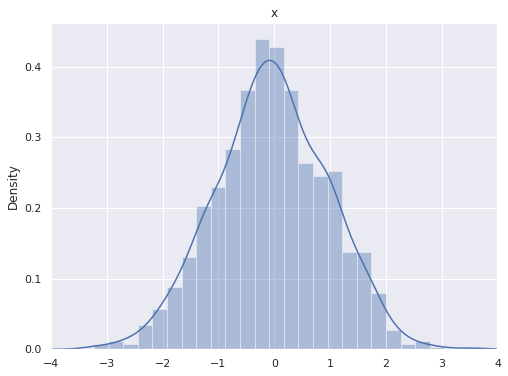

/home/renato/Documents/env_default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


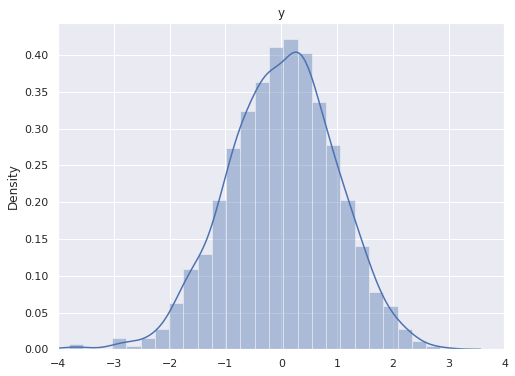

In [6]:
np.random.seed(123)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

sns.distplot(x)
plt.title('x')
plt.xlim(-4, 4)
plt.show()
sns.distplot(y)
plt.title('y')
plt.xlim(-4, 4)
plt.show()


Let's try to understand what is really represented on these plots. I used the function `distplot` from the package seaborn. The y-axis gives the **probability density** that the variable takes the value given by the x-axis. You can find more details on probability density functions in [the last post](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/)/[notebook](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions). In short, the area under the curve has to be calculated for a certain range of the x axis to get the probability to get a value into that range. 

Now, what about the marginal probabilities? If we want to get the marginal probability of $\text{x}$, we need to get the **area under the curve** of the probability density function along the y-axis. You can imagine that we look the 3D plot only from the y-axis (or a projection on this axis) and get the area under the curve.

For discrete variables $\text{x}$ and $\text{y}$, we have seen that marginal probability $P(\text{x})$ is the sum of the probabilities for each value of $\text{y}$. Now that our variables are continuous, we have to use **integrals** but the principle is the same:

- To calculate the marginal probability $P(\text{x})$, we calculate the area under the curve of the projection of the variable on the x-axis.
- To calculate the marginal probability $P(\text{y})$, we calculate the area under the curve of the projection of the variable on the y-axis.

<img src="images/bivariate-gaussian-curves.png" width="500" alt="Probability density functions of two gaussian variables" title="Probability density functions of two gaussian variables.">
<em>Probability density functions of two gaussian variables - <a href="https://en.wikipedia.org/wiki/Marginal_distribution">source</a></em>

This is used to recover the probability distribution of one variable when we know the joint probability distribution. 

This can be expressed with the following equation:

$$
p(x) = \int p(x, y)dy
$$

and

$$
p(y) = \int p(x, y)dx
$$

For more explanations about integration, you can check out this [post](https://hadrienj.github.io/posts/Probability-Mass-and-Density-Functions/)/[notebook](https://github.com/hadrienj/deepLearningBook-Notes/tree/master/3.1-3.3%20Probability%20Mass%20and%20Density%20Functions). The variable following the small $d$ at the end of the equation tells the variable used for the integration. So in the first equation, we integrate over $\text{y}$. This means that we consider $\text{x}$ as a constant. We do the opposite in the second equation.


# 3.5 Conditional Probability

Conditional probability refers to the probability of an event given that another event occurred.

### Dependent and independent events

First, it is important to distinguish between dependent and independent events! The intuition is a bit different in both cases.

#### Example of independent events: dice and coin

In this example, we do an experiment where we throw a dice and toss a coin. We'll call two random variables describing these events with $\text{x}$ corresponding to the dice throw and $\text{y}$ corresponding to the coin toss.

A question we can ask is: what is the probability to get a 3 from the dice throw and a 'head' from the coin toss?

We can see that the two events are independent because we don't expect any effect of one on the other.

#### Example of dependent events: two cards from a deck

In this example, we'll get two cards in a deck without replacement. The probabilities are different when we take the first card (all 52 cards are in the deck) and when we take the second card (there is now 51 cards, one missing). This means that the events are dependent: the result from the first draw will impact the probabilities of the second draw.

A question we can ask is: what is the probability to draw a 6 on the second draw when we got a 6 on the first draw?

### Notation

<img src="images/conditional-probability.png" width="300" alt="Explanation of the equation of conditional probability" title="Conditional probability.">
<em>Conditional probability</em>

Let's introduce some new notation: $P(\text{y}=y | \text{x}=x)$ describes the **conditional probability**: it is the probability that the random variable $\text{y}$ takes the specific value $y$ **given that** the random variable $\text{x}$ took the specific value $x$. It is different from $P(\text{y}=y, \text{x}=x)$ which corresponds to the probability of getting both the outcome $y$ for the random variable $\text{y}$ and $x$ for the random variable $\text{x}$. In the case of conditional probability, the event associated with the random variable $\text{x}$ has already produced its outcome ($x$).

Mathematically, there is a convenient relationship between conditional probabilities and joint probability:

$$
P(\text{y}=y | \text{x}=x) = \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)}
$$

Let's be verbose and convert the equation in plain English:

The probability that the random variable $\text{y}$ takes the value $y$ given that the random variable $\text{x}$ took the value $x$ is the ratio of the probability that both events occur ($\text{y}$ takes the value $y$ and $\text{x}$ takes the value $x$) and the probability that $\text{x}$ takes the value $x$.

It may be more intuitive to look at it in another direction:

$$
P(\text{y}=y, \text{x}=x) = P(\text{x}=x) P(\text{y}=y | \text{x}=x)
$$

It can be understood like that: to calculate the probability that both events occur, we have to take the probability that the first event occurs ($ P(\text{x}=x)$) and multiply it with the probability that the second event occurs given that the first event occurred ($P(\text{y}=y | \text{x}=x)$). Clear?

#### Multiplying probabilities

This last explanation leads to a question. We used probability multiplication ($P(\text{x}=x)$ multiplied with $P(\text{y}=y | \text{x}=x)$) to represent the probability that multiple events occur ($P(\text{y}=y, \text{x}=x)$). Let's see why this makes sense.

<img src="images/inside-probability.png" width="500" alt="Inside of a probability" title="What is exactly a fraction representing a probability?">
<em>The probability is the ratio between the number of successful outcomes over the total number of outcomes</em>

Take two independent events: we toss a coin twice (the first time corresponds to the first event and the second time to the second event) and we want to calculate the probability to get exactly two 'heads'. We know that the probability to get a 'head' at each trial is $\frac{1}{2}$.

To understand why probability multiplication has to be used we need to understand what is the probability of each event. Let's focus on the first event, the first coin tossing. The probability $\frac{1}{2}$: the 1 corresponds to the number of "success" outcomes (i.e. get a 'head'). The denominator (2) corresponds to the total number of possibilities. The possible outcomes are 'heads' or 'tails', so there are two outcomes. This leads to our probability $\frac{1}{2}$.

Now if we consider the two events, here are all the possibles outcomes:

- 'heads' and 'heads'
- 'heads' and 'tails'
- 'tails' and 'heads'
- 'tails' and 'tails'

We have still 1 success outcome ('heads' and 'heads') and there are 4 possible outcomes. The probability to get 'heads' and 'heads' is thus $\frac{1}{4}$.

The trick is here. To get the total number of possible outcomes, we just have to multiply the number of outcomes of each event. In this case $2 \times 2$. If we multiply the event probabilities we have: $\frac{1}{2} \times \frac{1}{2} = \frac{1}{4}$.

To be sure that conditional probability is crystal clear, we'll take an example for independent and dependent events. Besides, more details on the concept of independence are explained in 3.7.

We'll start with the case of independent events.


### Example 4.

First, let's recap all the mathematical notation we need. $P(\text{x}=x)$ is the probability that the variable $\text{x}$ takes the state $x$. For instance, $P(\text{x}=3)$ corresponds to the probability of rolling a 3 on a dice. In a similar way, $P(\text{y}=y)$ is the probability that the random variable $\text{y}$ take the value $y$. For instance, $P(\text{y}='heads')$ corresponds to the probability of getting a 'head'.

$P(\text{y}=y, \text{x}=x)$ is the joint probability of these events. For instance, $P(\text{x}=3, \text{y}='heads')$ is the probability of rolling a 3 on a dice and getting a 'heads' on a coin. For this example, let's say that we know that $P(\text{x}=3, \text{y}='heads')=\frac{1}{12}$.

$P(\text{y}=y | \text{x}=x)$ corresponds to the probability that $\text{y}=y$ given that $\text{x}=x$. This is thus a conditional probability. For instance, $P(\text{y}='heads' | \text{x}=3)$ corresponds to the probability of getting a 'head' given that we already roll a 3 on the dice.

Note that $P(\text{y}='heads' | \text{x}=3) = P(\text{y}='heads')$ because these events are independent. This means that the probability of $\text{x}$ is the same for any outcome of $\text{y}$.

In our example, we have:

$$
P(\text{y}='heads' | \text{x}=3) = \frac{P(\text{y}='heads', \text{x}=3)}{P(\text{x}=3)} = \frac{\frac{1}{12}}{\frac{1}{6}} = \frac{6}{12} = 0.5
$$

We can see that indeed $P(\text{y}='heads' | \text{x}=3) = P(\text{y}='heads') = 0.5$.


And we'll finish this article with an example with dependent events.
    
### Example 5.

In this example, we draw two cards without replacement. The first step is to use what we learned and write the problem using mathematical notation. We'll call $\text{x}$ the variable corresponding to the first draw and $\text{y}$ the variable corresponding to the second draw. The random variables $\text{x}$ and $\text{y}$ can both take value 1, 2, 3, 4, 5 or 6. These are the possible outcomes of the variables.

We have seen that the general formula to calculate conditional probability is:

$$
P(\text{y}=y | \text{x}=x) = \frac{P(\text{y}=y, \text{x}=x)}{P(\text{x}=x)}
$$

We want to know the probability to draw a 6 on the second draw given that we draw a 6 on the first draw. We can write it like it: $P(\text{y}=6 | \text{x}=6)$.

We'll need:

- The probability to draw a 6 on the first draw ($P(\text{x} = 6)$)
- The probability to draw a 6 both on the first **and** on the second draw ($P(\text{y} = 6, \text{x} = 6)$)

At the time of the first draw, the probability to draw a 6 is $\frac{4}{52}$ (there are 4 six in the deck of 52 cards) so $P(\text{x}=6)=\frac{4}{52}$. The probability to draw a pair of 6 is:

$$
P(\text{y}=6, \text{x}=6) = \frac{4}{52} \times \frac{3}{51} = \frac{12}{2652} = \frac{1}{221}
$$

The conditional probability we want to calculate is thus:

$$
P(\text{y}=6 | \text{x}=6) = \frac{P(\text{y}=6, \text{x}=6)}{P(\text{x}=6)} = \frac{\frac{1}{221}}{\frac{4}{52}} = \frac{1}{221}\times\frac{52}{4} = \frac{1}{221}\times 13 = \frac{13}{221} = 0.0588
$$

This means that we have almost 6% chances to draw a 6 once we already got a 6. We can note that it corresponds to $\frac{3}{51}$ (more details in the next chapter).


# Conclusion

We have seen that marginal probability refers to the probability of a single event in experiments of multiple events. There are relations between these marginal probabilities and joint probabilities expressing the probability that both events occur.

We also talked about conditional probability. It corresponds to probability under certain conditions, for instance, the probability to get a six in a deck of cards knowing that we already got a six and didn't replace it. We investigated the cases of dependent and independent events.

I hope that this article helped you to use and read the mathematical notation underlying these concepts.